In [15]:
import time
import math
import cv2
import sys, os
import os.path

from skimage import io
from skimage.color import rgb2gray

from sklearn import manifold

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader
from torch.distributions import Normal, Categorical
import torchvision.transforms as transforms

sys.path.append(os.path.abspath('../'))

from synthetic import VAE
from utils import Config, str2bool

IMG_DIR="/tmp/capture_20180813_1912"
SIM_IMG_DIR="/tmp/capture_20180809_1039"
MODEL = "/tmp/synthetic_20180727_1600/vae.pt"
CFG_PATH = "../configs/ppo_vae.json"

In [17]:
class CaptureDataset(Dataset):
    """Capture dataset."""

    def __init__(self, root_dir):
        """
        Args:
            root_dir (string): Directory with all the images.
        """
        self.root_dir = root_dir
        self.img_names = []
        listing = os.listdir(root_dir)
        for files in listing:
            if files.endswith('.jpeg'):
                self.img_names.append(files[:len(files)-len('.jpeg')])
        self.img_names.sort(key=int)

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.img_names[idx] + '.jpeg')
        image = rgb2gray(io.imread(img_name))
        sample = {'image': image}
        return sample

In [18]:
# load dataset 
dataset = CaptureDataset(IMG_DIR)
sim_dataset = CaptureDataset(SIM_IMG_DIR)
print("Dataset loaded...")


# load configuration
cfg = Config(CFG_PATH)

# load model
device = torch.device("cpu")
vae = VAE(cfg).to(device)
vae.load_state_dict(
    torch.load(MODEL, map_location='cpu'),
)
print("Model loaded...")

Dataset loaded...
Model loaded...


torch.Size([1, 1, 70, 160])


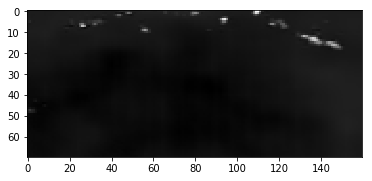

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


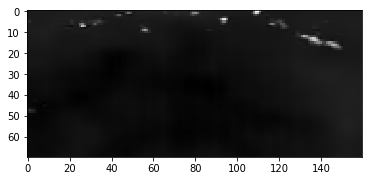

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


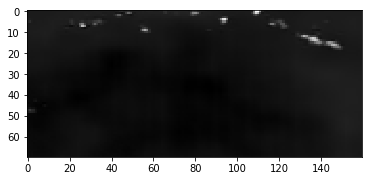

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


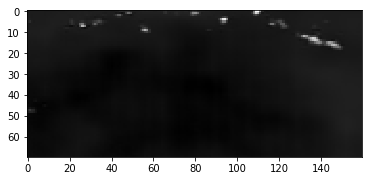

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


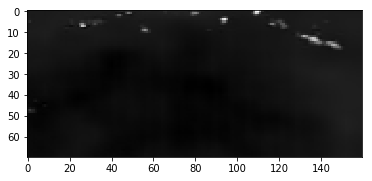

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


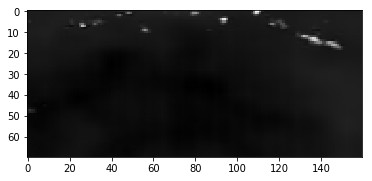

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


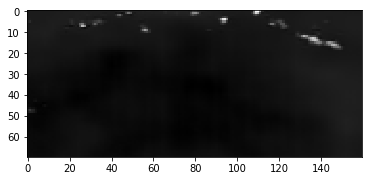

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


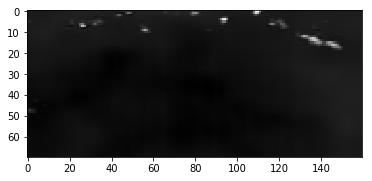

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


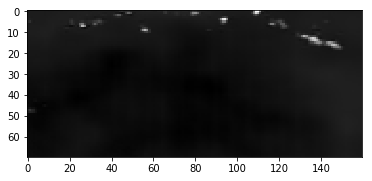

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


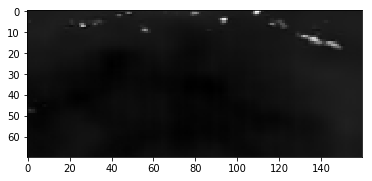

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


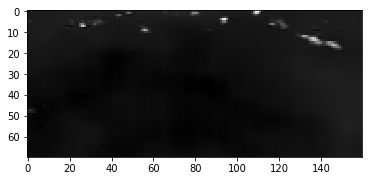

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


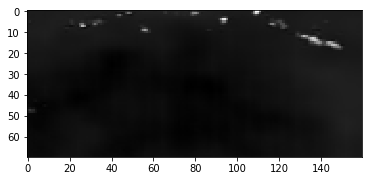

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


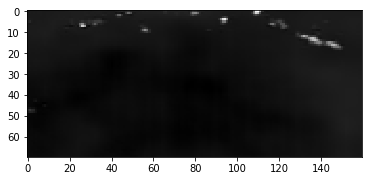

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


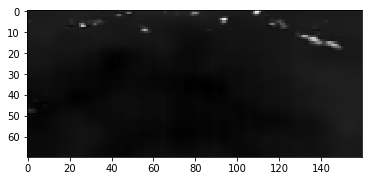

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


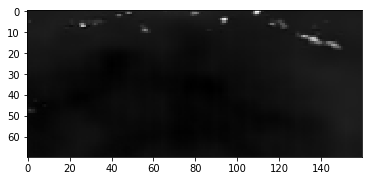

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


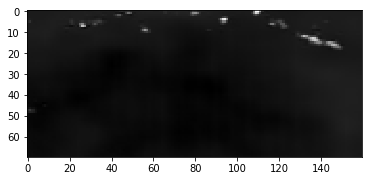

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


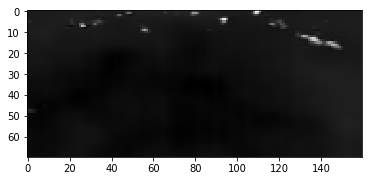

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


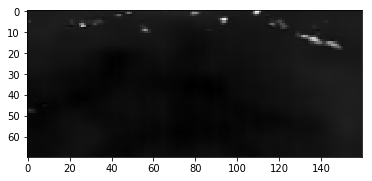

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


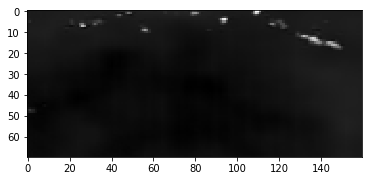

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


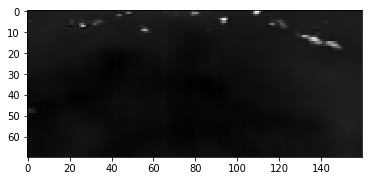

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


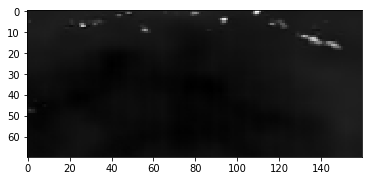

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


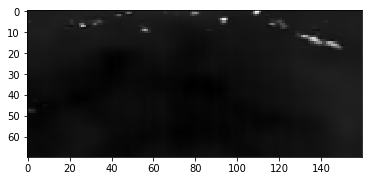

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


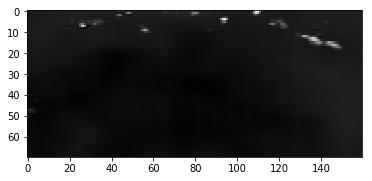

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


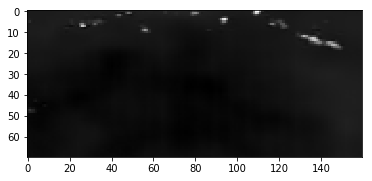

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


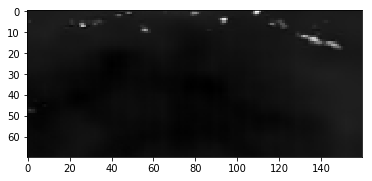

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


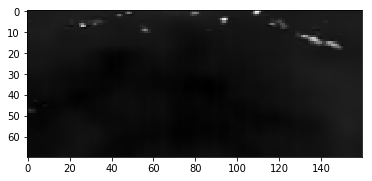

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


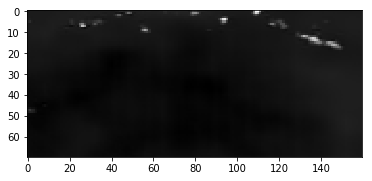

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


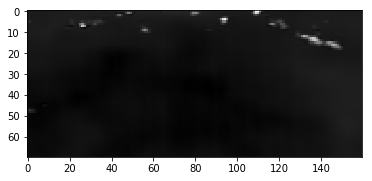

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


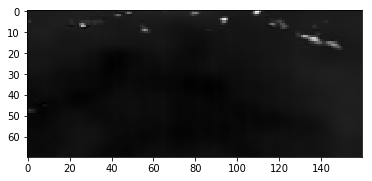

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


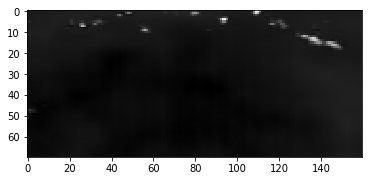

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


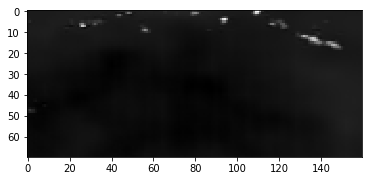

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


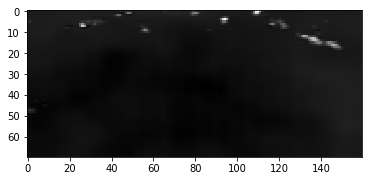

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


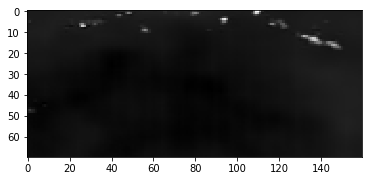

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


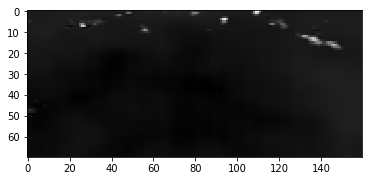

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


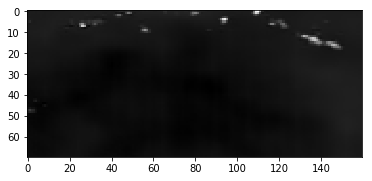

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


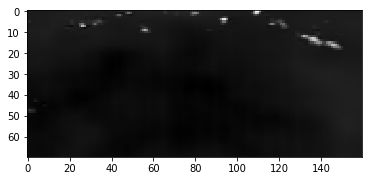

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


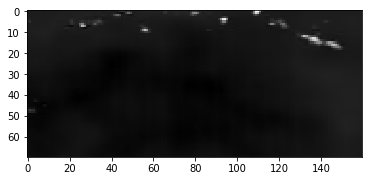

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


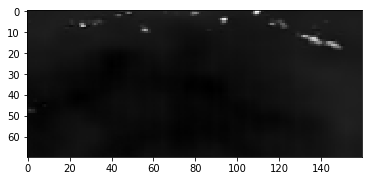

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


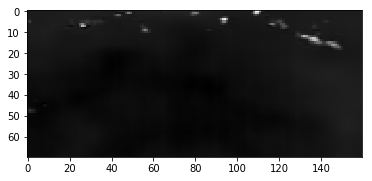

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


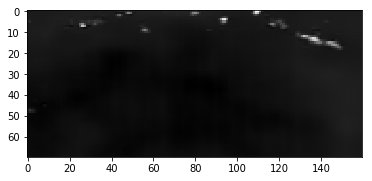

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


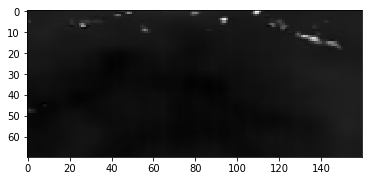

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


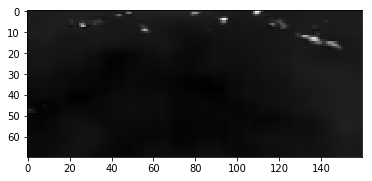

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


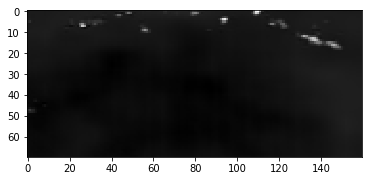

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


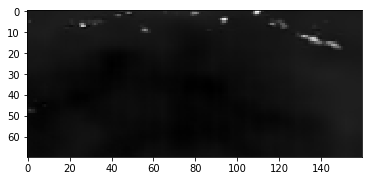

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


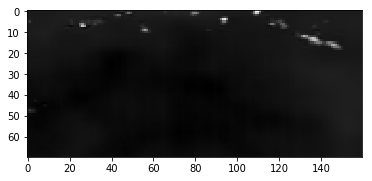

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


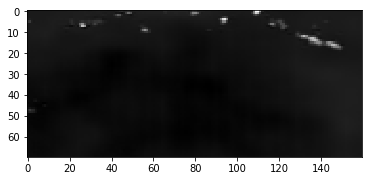

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


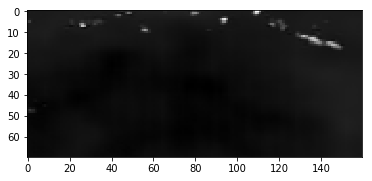

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


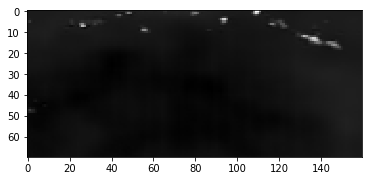

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


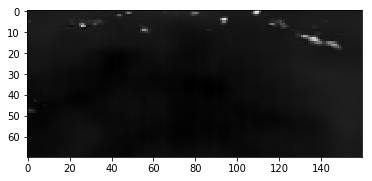

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


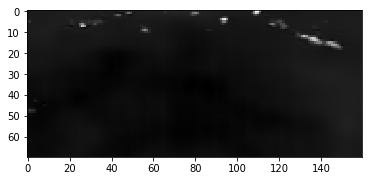

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


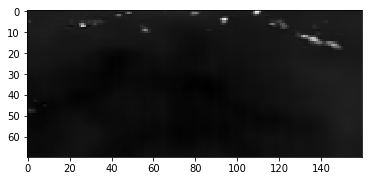

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


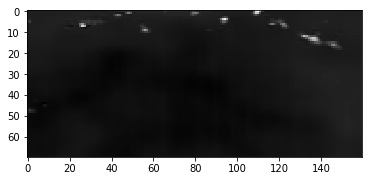

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


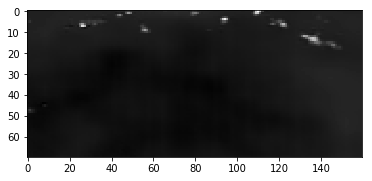

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


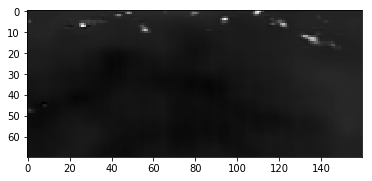

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


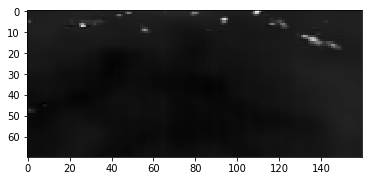

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


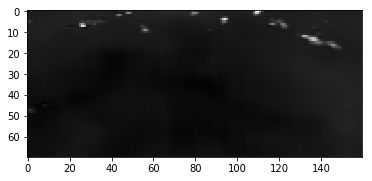

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


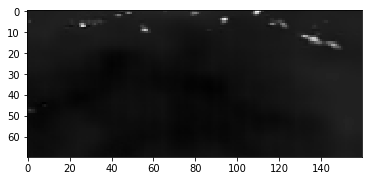

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


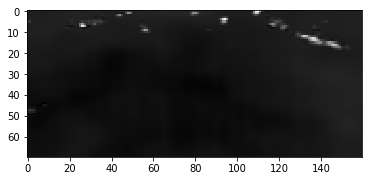

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


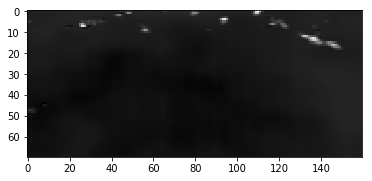

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


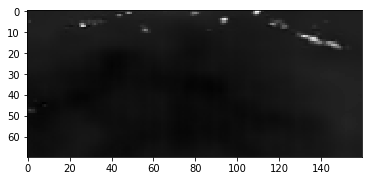

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


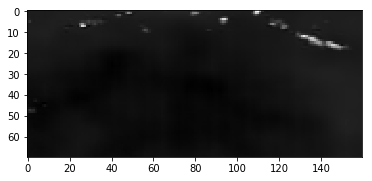

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


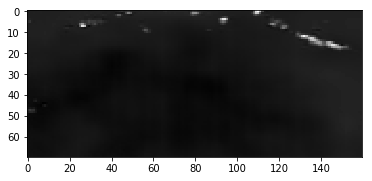

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


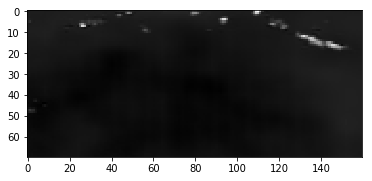

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


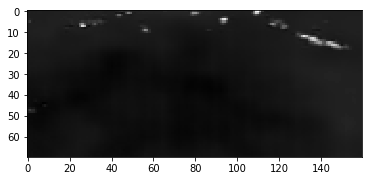

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


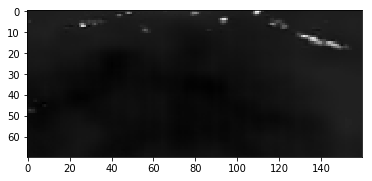

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


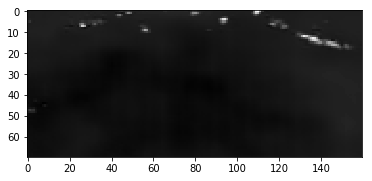

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


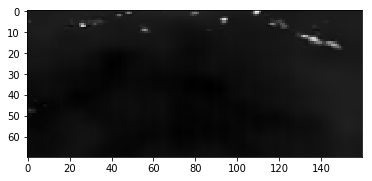

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


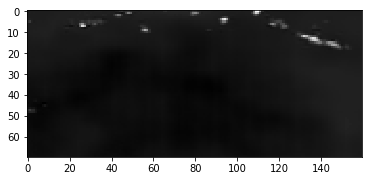

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


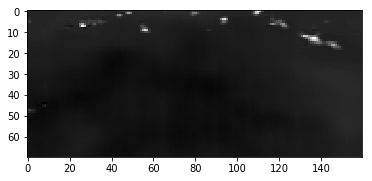

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


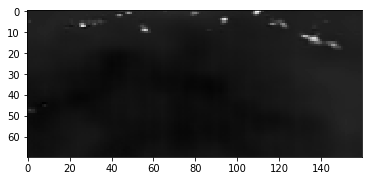

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


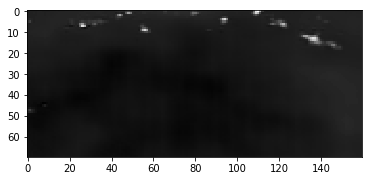

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


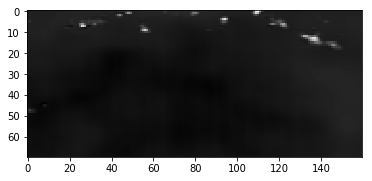

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


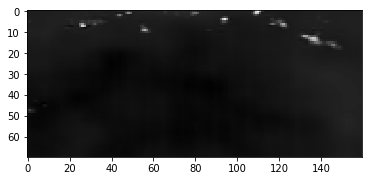

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


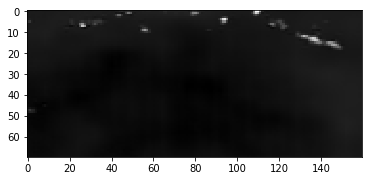

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


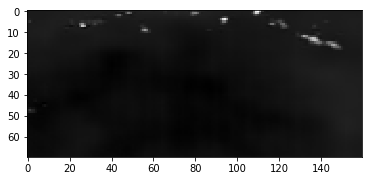

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


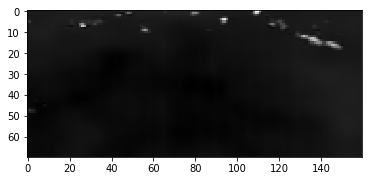

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


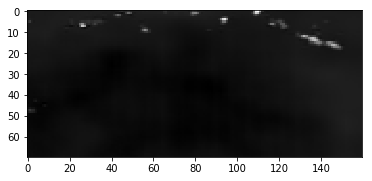

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


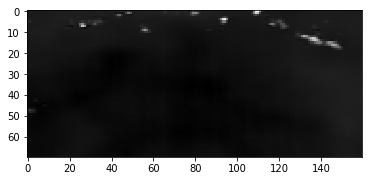

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


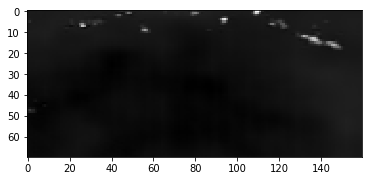

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


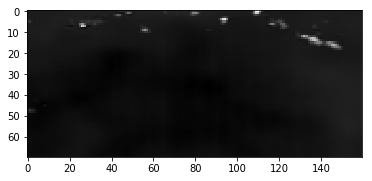

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


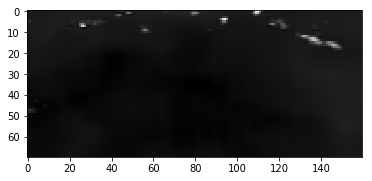

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


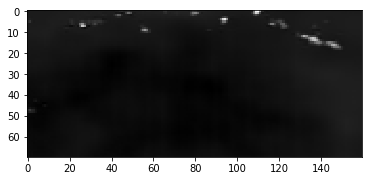

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


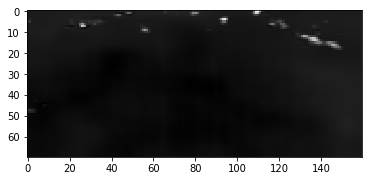

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


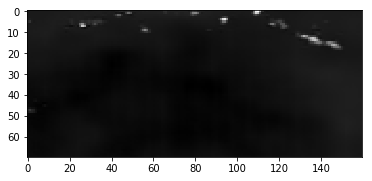

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


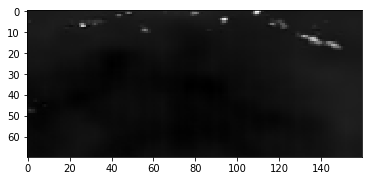

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


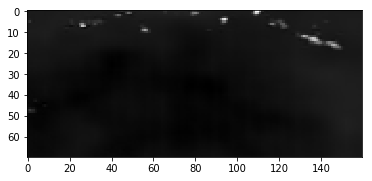

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


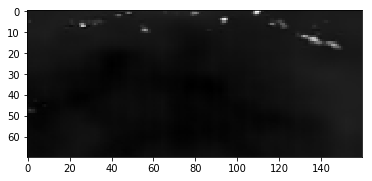

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


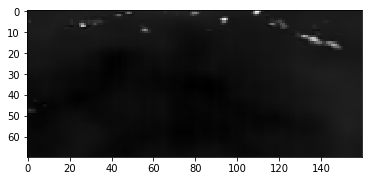

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


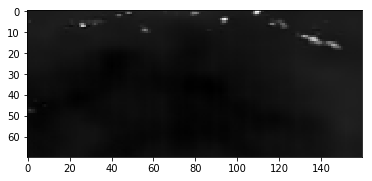

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


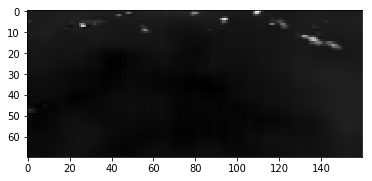

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


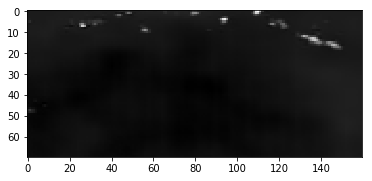

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


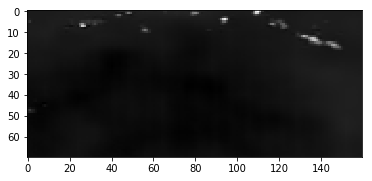

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


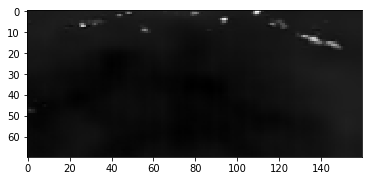

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


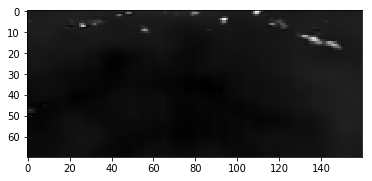

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


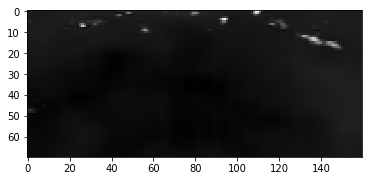

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


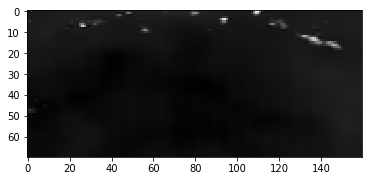

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


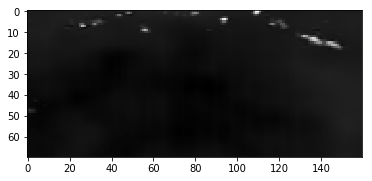

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


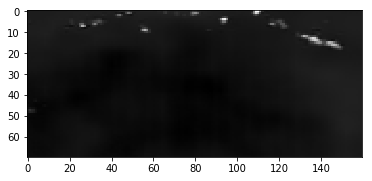

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


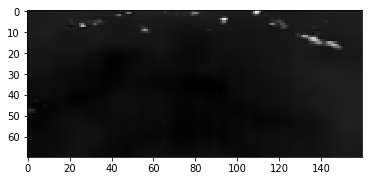

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


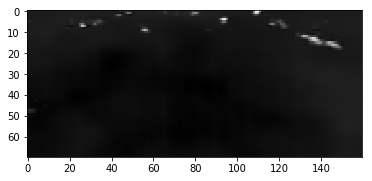

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


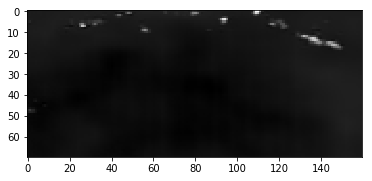

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


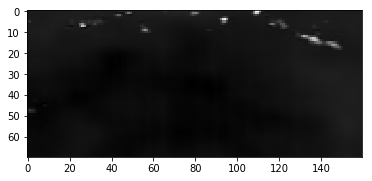

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


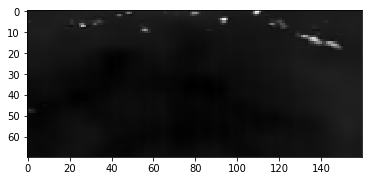

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


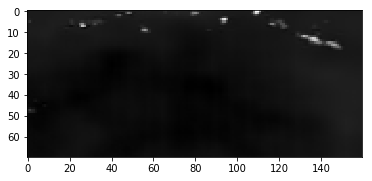

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


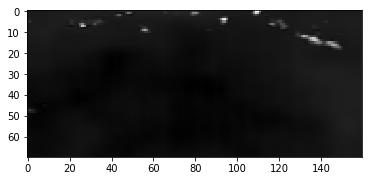

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


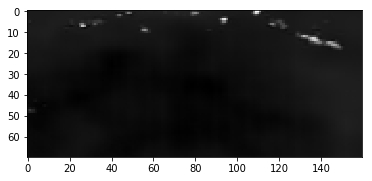

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


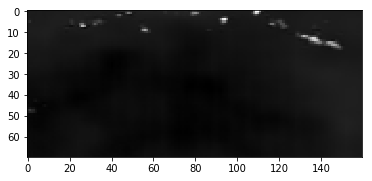

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


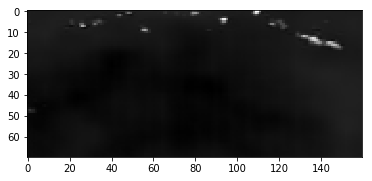

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


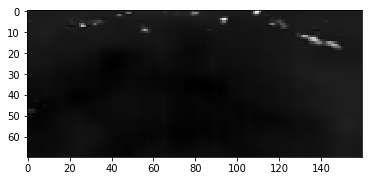

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


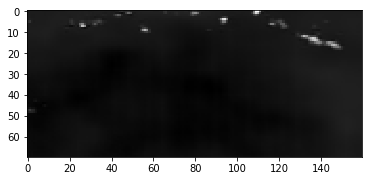

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


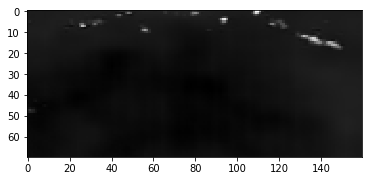

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


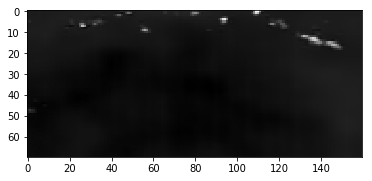

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


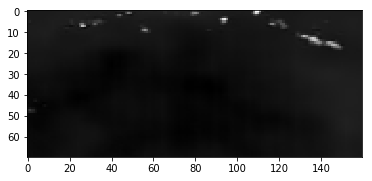

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


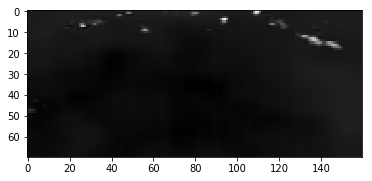

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


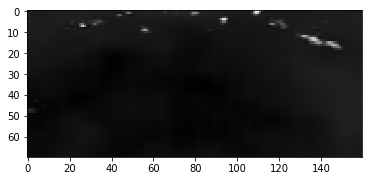

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


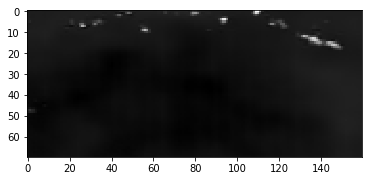

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


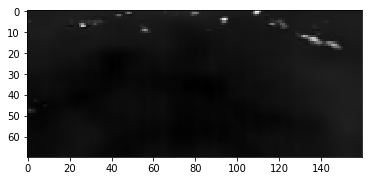

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


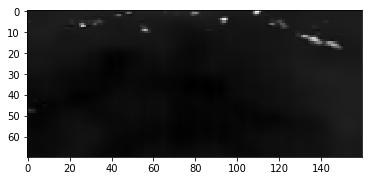

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


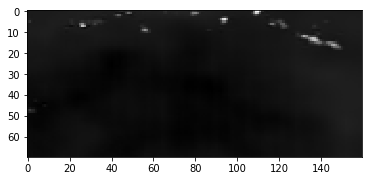

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


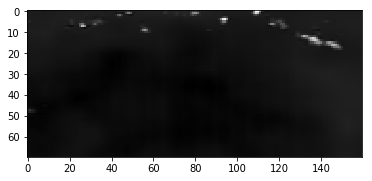

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


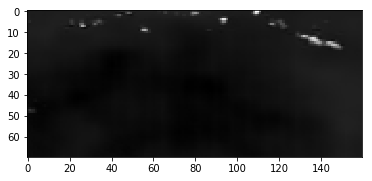

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


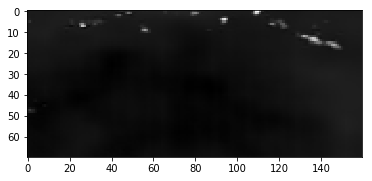

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


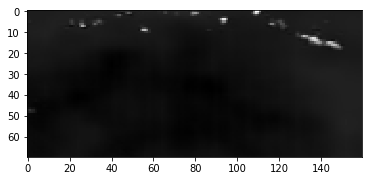

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


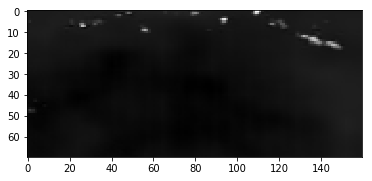

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


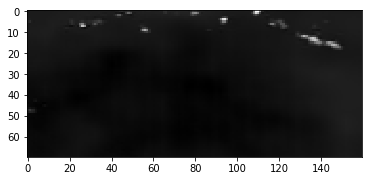

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


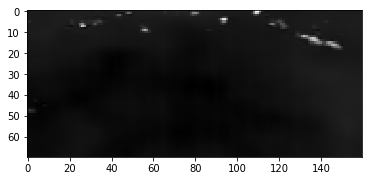

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


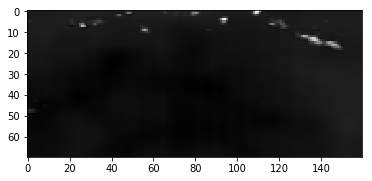

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


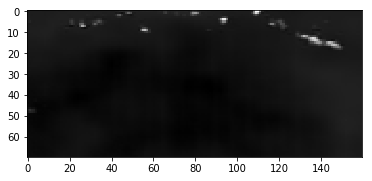

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


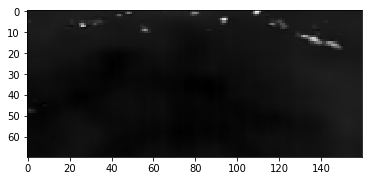

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


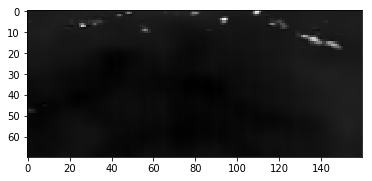

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


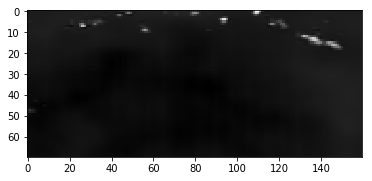

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


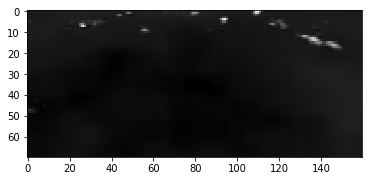

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


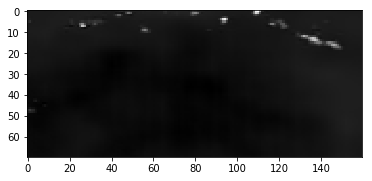

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


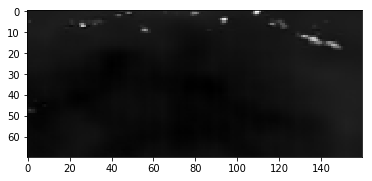

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


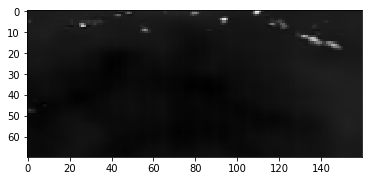

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


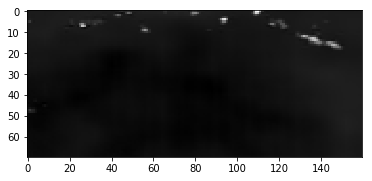

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


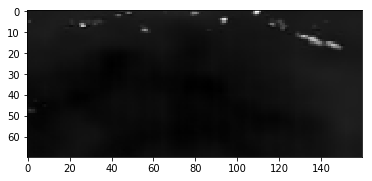

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


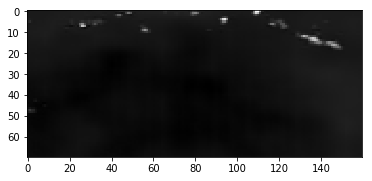

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


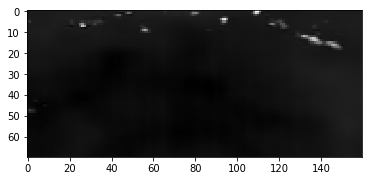

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


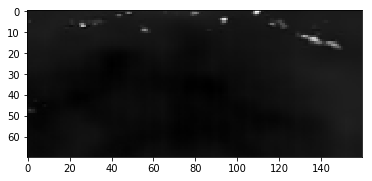

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


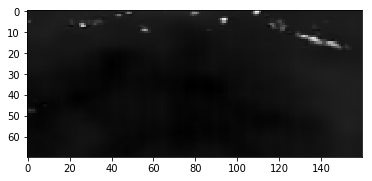

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


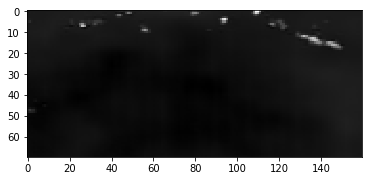

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


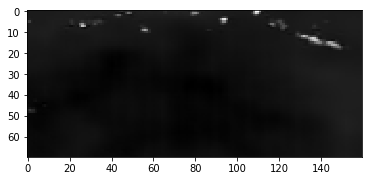

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


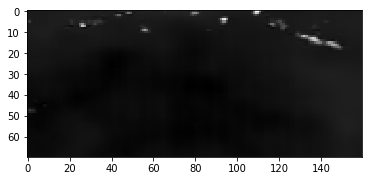

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


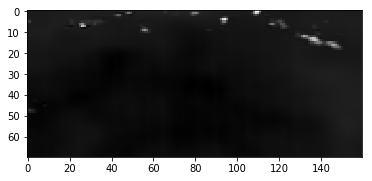

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


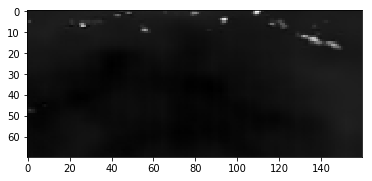

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


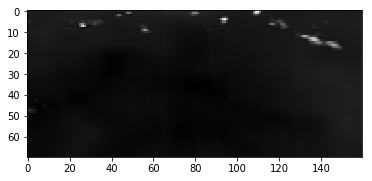

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


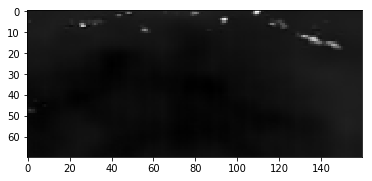

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


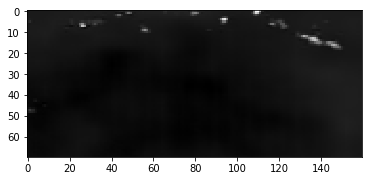

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


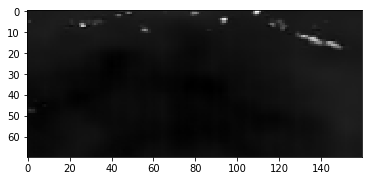

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


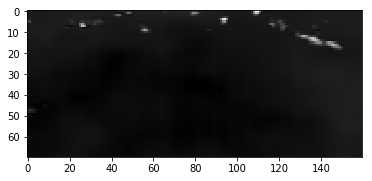

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


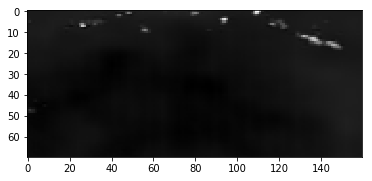

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


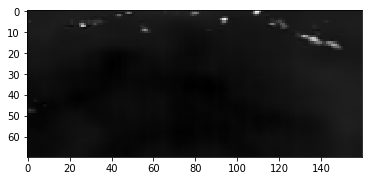

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


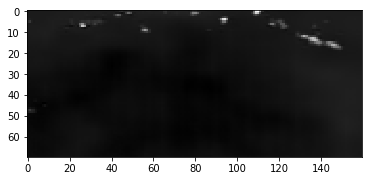

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


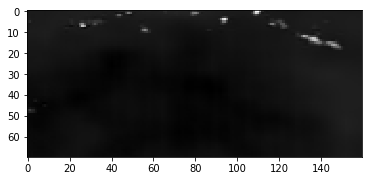

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


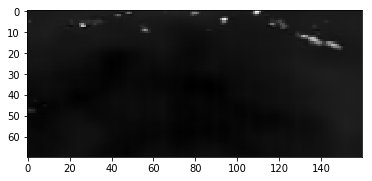

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


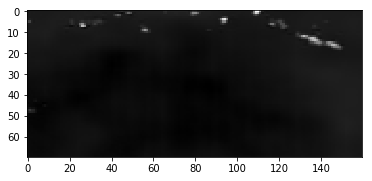

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


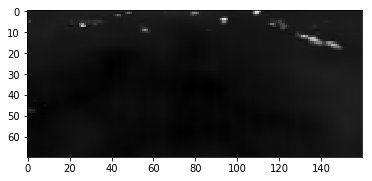

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


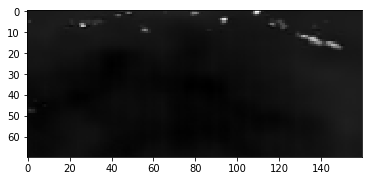

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


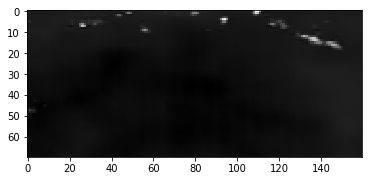

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


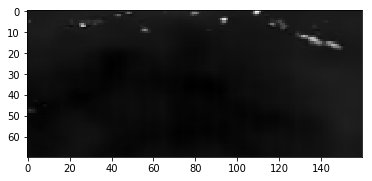

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


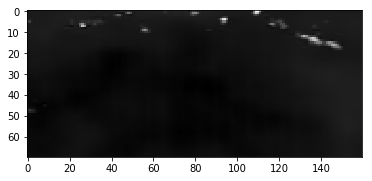

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


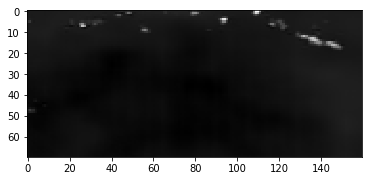

torch.Size([1, 32]) torch.Size([1, 1, 70, 160]) torch.Size([1, 32]) torch.Size([1, 32])
torch.Size([1, 1, 70, 160])


In [ ]:
# inference, find the latent values for our dataset
vae.eval()
latent = torch.zeros( [len(sim_dataset.img_names), 1, 32])

for i, data in enumerate(sim_dataset, 0):
    img = sim_dataset[i]["image"] 
    img = (torch.from_numpy(np.array([img[50:]], np.uint8))/255.0).float()
    img = img.to(device).unsqueeze(0)
    
    vae_latent, encoded, vae_mean, vae_logvar = vae(img, deterministic=False,)
#     print(encoded.shape)
#     plt.imshow(np.squeeze(encoded.detach()))
#     plt.show()
    
    print(vae_latent.shape, encoded.shape, vae_mean.shape, vae_logvar.shape)
    latent[i,:,:] = vae_latent

print("Latent values infered...")
#     show latent space values
#     vae_latent_image = torch.unsqueeze(vae_latent, 0)
#     plt.imshow(transforms.ToPILImage()(vae_latent_image))
#     plt.show()

Computing t-SNE embedding...
Plotting t-SNE visualization...


<Figure size 432x288 with 0 Axes>

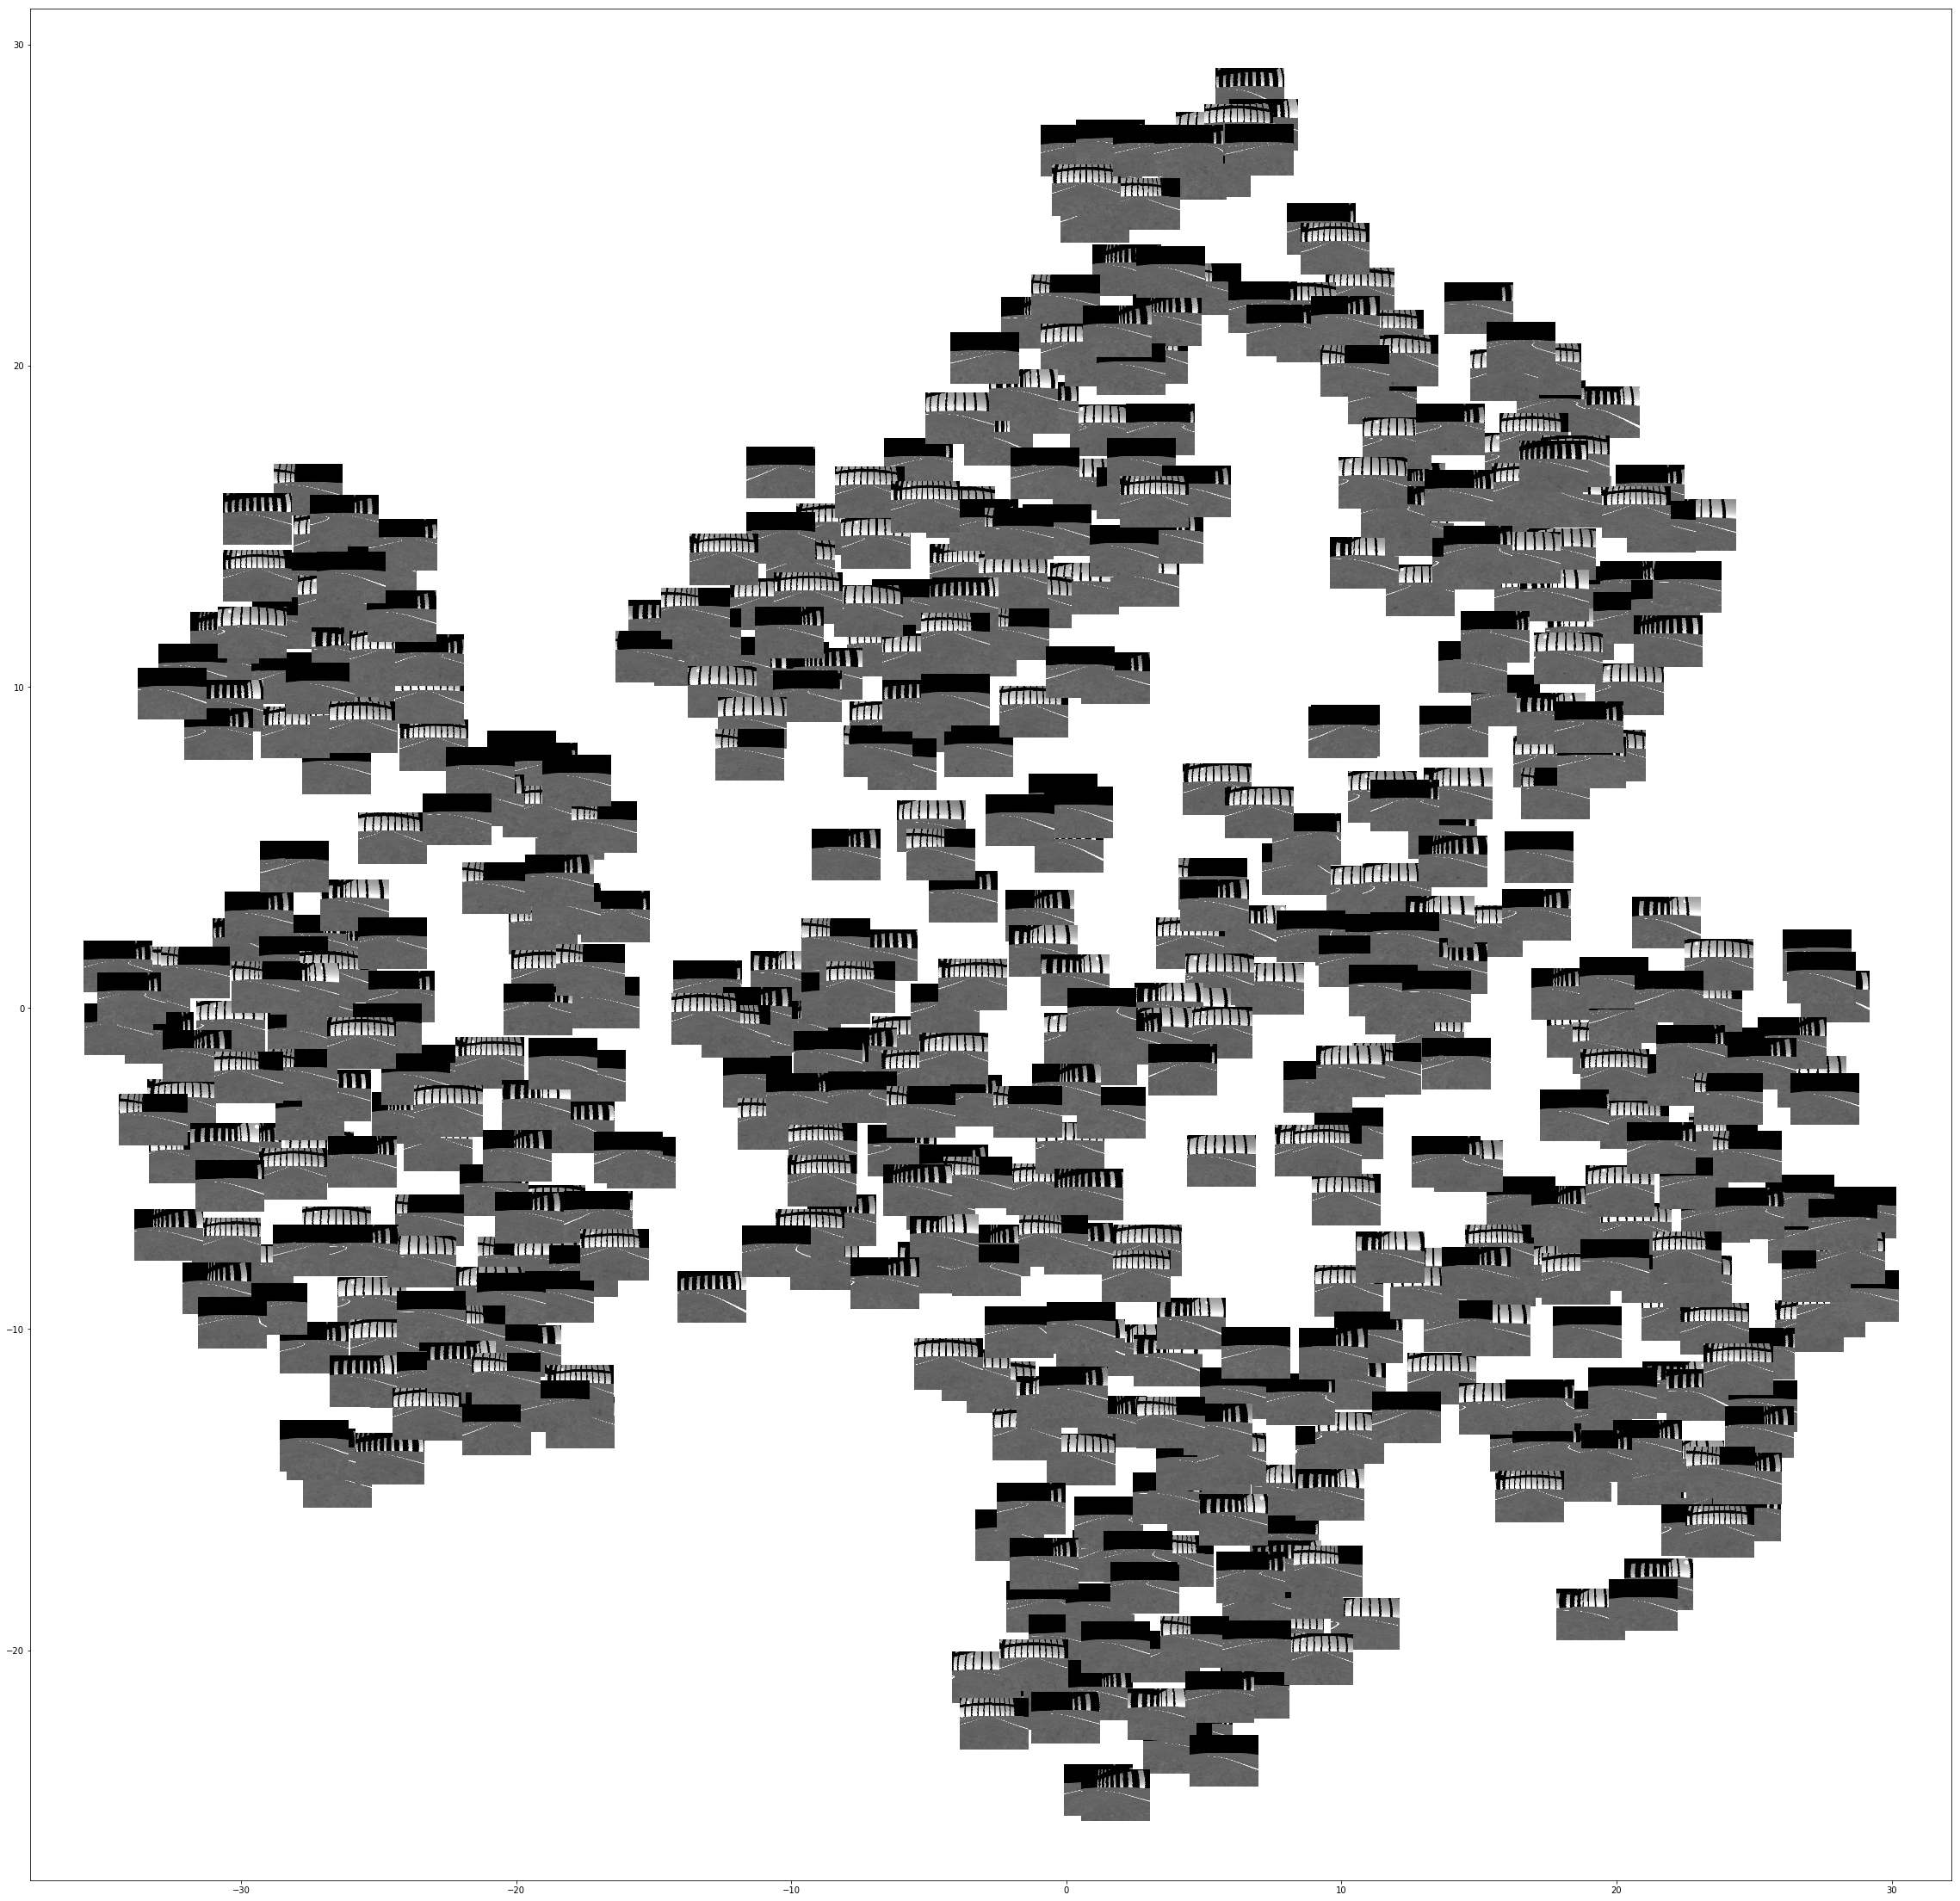

In [21]:
plt.gray()

# Show dataset images with T-sne projection of latent space encoding
def computeTSNEProjectionOfLatentSpace(X, annotation_images, display=True):
    
    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    X_tsne = manifold.TSNE(n_components=2).fit_transform(X.reshape(-1,32))
    
    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots(1,1, figsize=(40,40))
        imscatter(X_tsne[:, 0], X_tsne[:, 1], ax, annotation_images, 0.5)
    else:
        return X_tsne
    
# Scatter with images instead of points
def imscatter(x, y, ax, images, zoom): 
    annotated_images = []
    for i in range(len(x)):
        x0, y0 = x[i], y[i]
        # Convert to image
        # Note: OpenCV uses BGR and plt uses RGB
        img = images[i,:,:]
        img = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        annotated_images.append(ax.add_artist(ab))

    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()


# images = torch.zeros( [len(sim_dataset.img_names), 120, 160])
images = np.zeros([len(sim_dataset.img_names), 120, 160])

# create a tensor of the inputs
for i, data in enumerate(sim_dataset, 0):
    img = sim_dataset[i]["image"] 
    images[i,:, :] = np.array([img])

computeTSNEProjectionOfLatentSpace(latent.detach().numpy(), images)